In [8]:
import importlib
import moc_cart_threaded as MOC

# import moc_cart as MOC
import shapely

import matplotlib.pyplot as plt

In [9]:
from plot_scalar_flux import *

In [10]:
materials = {
    "reflector": MOC.Material(2.0, 1.80, 0.0, "reflector", "blue"),
    "scatterer": MOC.Material(2.0, 1.99, 0.0, "scatterer", "red"),
    "absorber": MOC.Material(10.0, 2.0, 0.0, "absorber", "green"),
    "air": MOC.Material(0.1, 0.006, 0.0, "air", (0.9, 0.97, 1.0, 0.3)),
    "isotropic": MOC.Material(0.1, 0, 1, "isotropic", "purple"),
    "detector": MOC.Material(1.0, 0, 0, "detector", "yellow"),
    "vacuum": MOC.Material(0.0, 0.0, 0.0, "vacuum", "black"),
}

In [11]:
total_dx = 5


def make_blocks(x0, y0, dx=0.1, dy=0.1, total_dx=total_dx, total_dy=total_dx, material=materials["reflector"]):
    """Create a grid of blocks in the x-y plane."""

    if type(material) is str:
        material = materials[material]

    number_blocks_x = int(total_dx / dx)
    assert number_blocks_x == total_dx / dx, "total_dx must be a multiple of dx"
    
    number_blocks_y = int(total_dy / dy)
    assert number_blocks_y == total_dy / dy, "total_dy must be a multiple of dy"

    cells = {}
    for i_block in range(number_blocks_x):
        for j_block in range(number_blocks_y):
            x = x0 + i_block * dx
            y = y0 + j_block * dx
            cell = shapely.geometry.box(x, y, x + dx, y + dx)
            cell_data = MOC.CellData(cell, material)
            cells[cell] = cell_data

    return cells


def plot_mesh(cells):
    # fig, ax = plt.subplots()
    # for cell, cell_data in cells.items():
    #     shapely.plotting.plot_polygon(
    #         cell, color=cell_data.material.color, alpha=0.5, ax=ax
    #     )

    fig, ax = plt.subplots()
    material_handles = {}
    for cell, cell_data in cells.items():
        coords = np.array(cell.exterior.coords)
        polygon = plt.Polygon(
            coords,
            closed=True,
            facecolor=cell_data.material.color,
            alpha=0.5,
            edgecolor="black",
            linewidth=0.03,
        )
        ax.add_patch(polygon)

        mat_name = cell_data.material.name
        if mat_name not in material_handles:
            material_handles[mat_name] = mpatches.Patch(
                facecolor=cell_data.material.color,
                edgecolor="black",
                alpha=0.5,
                label=mat_name,
            )

    ax.autoscale_view()
    ax.set_aspect("equal")

    ax.legend(
        handles=list(material_handles.values()),
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
    )

    return fig, ax

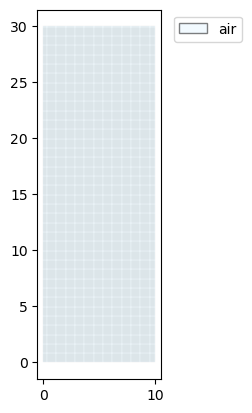

In [ ]:
cells = make_blocks(0, 0, dx=0.1, dy=0.5, total_dx=10, total_dy=30, material="air")
fig, ax = plot_mesh(cells)

Generating rays...
Rays generated in 261.26 seconds
Iter 0 error: 14.953917
Iter 1 error: 0.241700
Iter 2 error: 0.004653
Iter 3 error: 0.000094
Iter 4 error: 0.000002
Iter 5 error: 0.000000
Converged in 5 iterations with error 0.000000


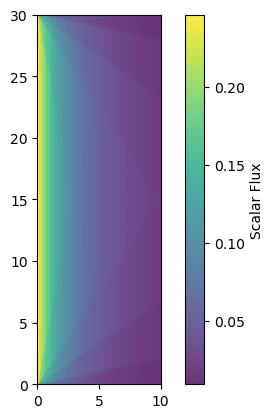

In [15]:
quad = MOC.ProductQuadrature(16, 4)
solver = MOC.CartesianMOC(cells, quad, bc_west=1, ray_width=0.05)
solver.solve()
fig = plot_scalar_flux(solver)